In [1]:
#Importing Libraries

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# visualization tools
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

ModuleNotFoundError: No module named 'pandas_profiling'

In [3]:
df = pd.read_csv("heart_disease_data.csv")

In [4]:
df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
160,56,1,1,120,240,0,1,169,0,0.0,0,0,2,1
57,45,1,0,115,260,0,0,185,0,0.0,2,0,2,1
63,41,1,1,135,203,0,1,132,0,0.0,1,0,1,1
116,41,1,2,130,214,0,0,168,0,2.0,1,0,2,1
97,52,1,0,108,233,1,1,147,0,0.1,2,3,3,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


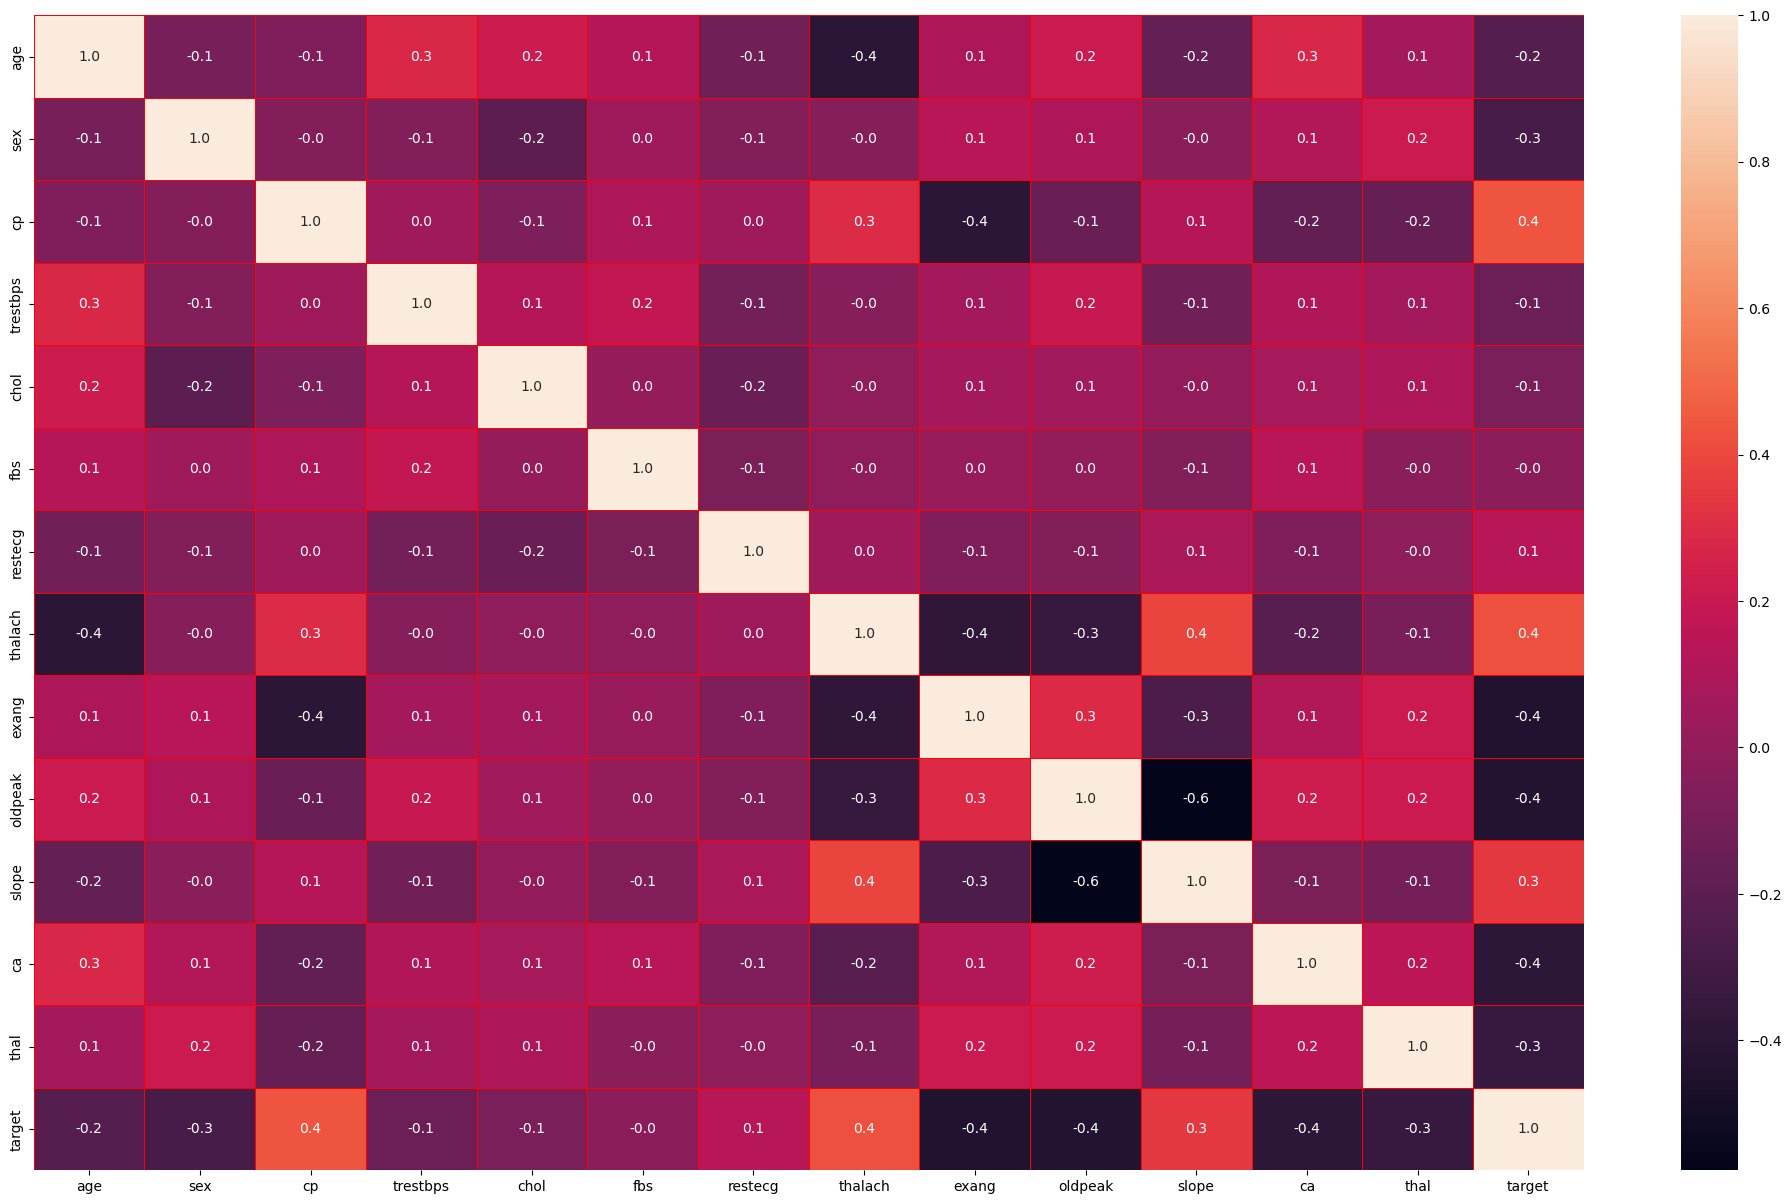

In [10]:
f,ax = plt.subplots(figsize=(25, 15))
sns.heatmap(df.corr(), annot=True, linewidths=0.5,linecolor="red", fmt= '.1f',ax=ax)
plt.show()

In [11]:
#Separating Features and Labels

In [12]:
X=df.iloc[:, 0:13]
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [13]:
y=df.iloc[:,-1]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [14]:
#Data Standardisation

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [16]:
#Splitting Dataset into Training Set and Testing Set

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
#Build Naive Bayes Model with Default Hyperparameter

In [19]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [20]:
#Accuracy Score

In [21]:
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.8688524590163934


In [22]:
#Confusion Matrix with Seaborn - Heatmap

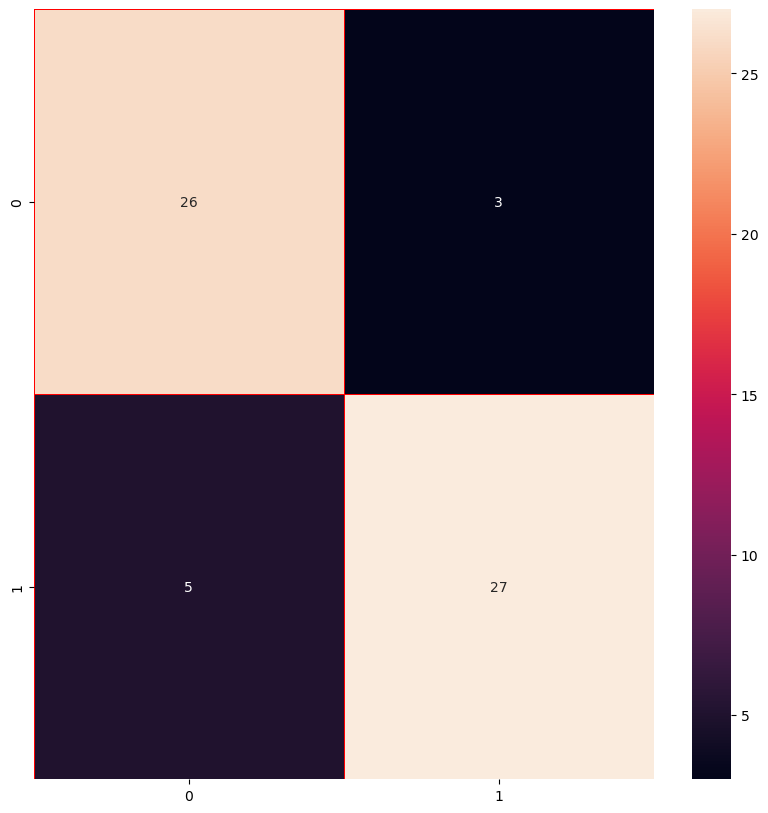

<Figure size 640x480 with 0 Axes>

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(cm, annot=True, linewidths=0.5,linecolor="red", fmt= '.0f',ax=ax)
plt.show()
plt.savefig('ConfusionMatrix.png')

In [24]:
#F1 Score

In [25]:
from sklearn.metrics import  f1_score
f1_score = f1_score(y_test, y_pred)
print("F1 Score:")
print(f1_score)

F1 Score:
0.870967741935484


In [ ]:
#Train Accuracy : 82.64%
#Test Accuracy : 86.89%